In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 16s 1us/step


In [13]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

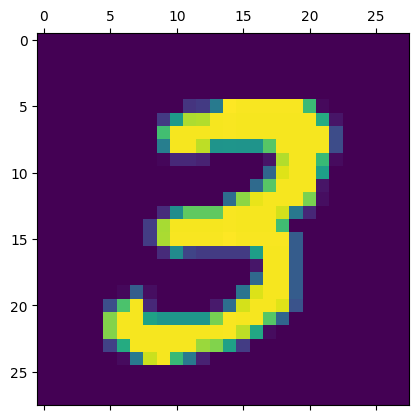

In [16]:
plt.matshow(X_train[7])

In [27]:
y_train[:30]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7], dtype=uint8)

In [31]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)
X_test_flatten.shape

(10000, 784)

In [32]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation ='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10,activation = 'sigmoid')]

)

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.compile(
    optimizer= 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics =['accuracy']
)



In [39]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 20,
    restore_best_weights = True
)

In [40]:
model.fit(
    X_train_flatten, y_train,
    epochs = 100,
    callbacks = [early_stopping]
)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8740 - loss: 0.4044
Epoch 2/100
  38/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9507 - loss: 0.1352 

c:\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9606 - loss: 0.1268
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9708 - loss: 0.0925
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9751 - loss: 0.0767
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9803 - loss: 0.0614
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9815 - loss: 0.0560
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9847 - loss: 0.0475
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9845 - loss: 0.0456
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9865 - loss: 0.0393
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9875 - loss: 0.0374
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9898 - loss: 0.0295
Epoch 12/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9901 - loss: 0.0302
Epoch 13/100
1875/1875 ━━━━━━━

In [41]:
model.evaluate(X_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9802 - loss: 0.1205


[0.10169903934001923, 0.9836999773979187]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

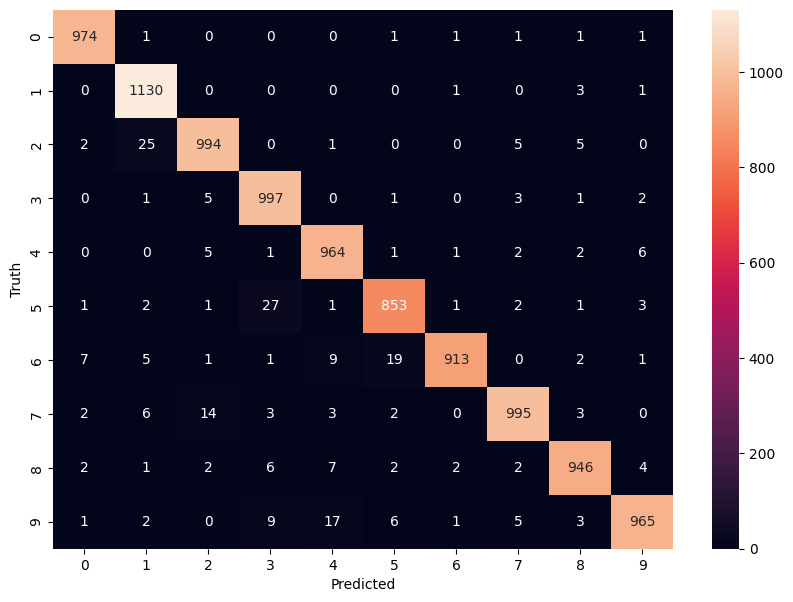

In [44]:
y_predicted = model.predict(X_test_flatten)
y_predicted_labels = [np.argmax(i) for i in  y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt ='d')
plt.xlabel("Predicted")
plt.ylabel('Truth')

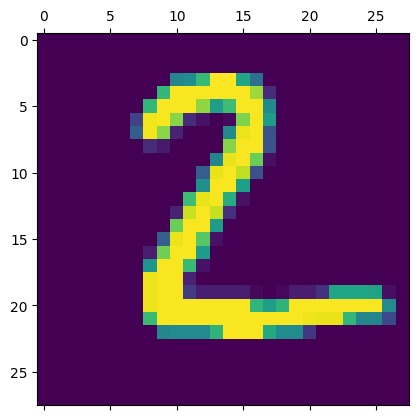

In [50]:
plt.matshow(X_test[1])

In [53]:
np.argmax(y_predicted[1])

2